In [1]:
import pandas as pd

In [2]:
# Load the dataset
filename = 'discussions.csv'
df = pd.read_csv(filename)

In [6]:
df.head()

,actor_id,membership_role,timestamp,post_id,post_parent_id,discussion_topic_title,discussion_topic_id,discussion_topic_message_length,post_message_length,count_of_likes
0,INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:01+00:00,e29fca96e5557a20cabec778dc885345,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,367,0,0
1,INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:02+00:00,cf6816ae103ab5e2c82d6595eb49e02e,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,0,0
2,LEARNER_3,"[""Learner""]",2033-01-28 06:55:40+00:00,abb6c24171f8b195cf0d050858e4ff18,cf6816ae103ab5e2c82d6595eb49e02e,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,564,0
3,LEARNER_11,"[""Learner""]",2033-01-29 01:04:32+00:00,a250f9cde1c58d4dba3d4f918e82a018,abb6c24171f8b195cf0d050858e4ff18,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,174,0
4,LEARNER_3,"[""Learner""]",2033-01-29 05:54:31+00:00,3ac8537702d3d7d8bf033d73a4491591,a250f9cde1c58d4dba3d4f918e82a018,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,226,0


In [9]:
# Basic descriptive statistics
print(df[['discussion_topic_message_length', 'post_message_length']].describe())

       discussion_topic_message_length  post_message_length
count                      1611.000000          1611.000000
mean                        917.047796          1079.855990
std                         433.600259           952.027795
min                          79.000000             0.000000
25%                         611.000000           402.000000
50%                         783.000000           785.000000
75%                        1369.000000          1475.000000
max                        2359.000000          6298.000000


In [11]:
# Count of posts by actor
posts_by_actor = df['actor_id'].value_counts()
print(posts_by_actor.head())

INSTRUCTOR    254
LEARNER_6     166
LEARNER_4     111
LEARNER_7      88
LEARNER_5      64
Name: actor_id, dtype: int64


In [12]:
# Sum of likes by actor
likes_by_actor = df.groupby('actor_id')['count_of_likes'].sum()
print(likes_by_actor.sort_values(ascending=False).head())

actor_id
INSTRUCTOR    85
LEARNER_7     26
LEARNER_6     24
LEARNER_23    22
LEARNER_4     18
Name: count_of_likes, dtype: int64


In [13]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' as index
df.set_index('timestamp', inplace=True)

# Resample to get monthly counts of posts
monthly_posts = df['post_id'].resample('M').count()
# monthly post counts
print(monthly_posts)

timestamp
2033-01-31 00:00:00+00:00    596
2033-02-28 00:00:00+00:00    464
2033-03-31 00:00:00+00:00    422
2033-04-30 00:00:00+00:00    129
Freq: M, Name: post_id, dtype: int64


In [17]:
# Group by 'discussion_topic_id' and 'discussion_topic_title' and count the number of posts for each group
topic_counts = df.groupby(['discussion_topic_id', 'discussion_topic_title']).size()

# Sort the counts in descending order to find the most discussed topics
popular_topics_with_titles = topic_counts.sort_values(ascending=False)

# Display the top 5 most discussed topics with titles
print(popular_topics_with_titles.head())

discussion_topic_id               discussion_topic_title                           
e1f90c16c123e0f96b2af7d94a1c335c  Introduce yourself                                   281
c916612763c04832d8e7b9e89deb7d2a  Discussion 1: The meaning of eLearning               158
74d57e9d2bfa697878ac88bca9170c78  Discussion 6: Organization & support                 140
7c9e39571ad00fe24282e5b5366d7563  Discussion 2: Reflect on rationales for eLearning    140
bb62cd396b9a8a94ecef6b5d1c4f8ad1  Discussion 3: Funding issues                         130
dtype: int64


In [20]:
# Average post message length by membership role
avg_length_by_role = df.groupby('membership_role')['post_message_length'].mean()
print(avg_length_by_role)

membership_role
["Instructor"]     661.090551
["Learner"]       1158.239499
Name: post_message_length, dtype: float64


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

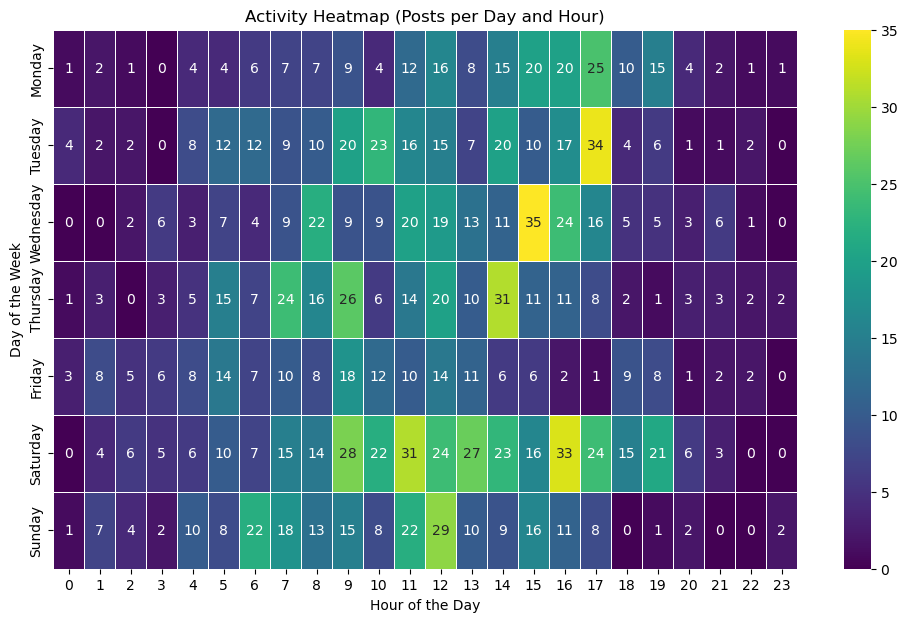

In [26]:
# new column for the hour of the day and the day of the week
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_name()

# for the heatmap; count the number of posts in each hour for each day
activity_matrix = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Order the days of the week starting from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
activity_matrix = activity_matrix.reindex(ordered_days)

# Plot the heatmap
plt.figure(figsize=(12, 7))  # You can adjust the size as needed
sns.heatmap(activity_matrix, cmap='viridis', linewidths=.5, annot=True)

# Add labels and a title
plt.title('Activity Heatmap (Posts per Day and Hour)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

# Show the plot
plt.show()

In [29]:
# Load the data
df1 = pd.read_csv('discussion_topics.csv')
df1.head()

,id,title,position,podcast_has_student_posts,discussion_type,lock_at,allow_rating,discussion_subentry_count,podcast_url,read_state,published,pinned,todo_date_date
0,132f3fab56d60839d727b966a76c1b1e,Assignment 1 Discussion forum,NaN,False,threaded,NaN,True,0,NaN,read,True,False,NaN
1,e1f90c16c123e0f96b2af7d94a1c335c,Introduce yourself,NaN,False,threaded,NaN,True,0,NaN,unread,True,False,2033-01-15 20:06:09+00:00
2,7c9e39571ad00fe24282e5b5366d7563,Discussion 2: Reflect on rationales for eLearning,NaN,False,threaded,NaN,True,0,NaN,unread,True,False,2033-01-29 20:05:10+00:00
3,c916612763c04832d8e7b9e89deb7d2a,Discussion 1: The meaning of eLearning,NaN,False,threaded,NaN,True,0,NaN,unread,True,False,2033-01-22 20:06:09+00:00
4,bb62cd396b9a8a94ecef6b5d1c4f8ad1,Discussion 3: Funding issues,NaN,False,threaded,NaN,True,0,NaN,unread,True,False,2033-02-05 20:06:09+00:00


In [30]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [31]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christimariam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christimariam/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
# Assuming 'discussion_subentry_count' is a column in your dataframe
# We sort the dataframe based on 'discussion_subentry_count' in descending order
df1_sorted = df1.sort_values(by='discussion_subentry_count', ascending=False)

In [36]:
# Select the top N discussions
top_discussions = df1_sorted.head(10)

In [37]:
# Get the titles of the top discussions
top_titles = ' '.join(top_discussions['title'].dropna().values)

# Tokenize and clean the titles as before
top_tokens = word_tokenize(top_titles)
top_words = [word.lower() for word in top_tokens if word.isalpha() and word.lower() not in stop_words]

# Frequency distribution for top words
top_fdist = FreqDist(top_words)
for word, frequency in top_fdist.most_common(10):
    print(f'{word}: {frequency}')

discussion: 8
elearning: 4
assignment: 3
forum: 3
readiness: 2
reflections: 2
casual: 1
area: 1
q: 1
guest: 1


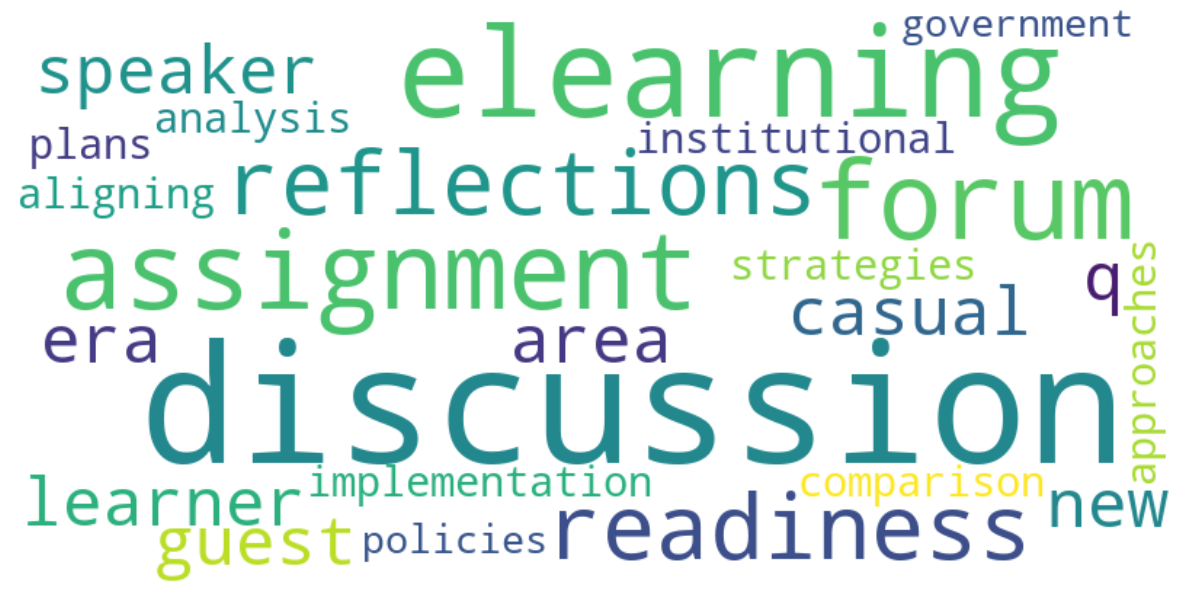

In [38]:
# Generate a word cloud image for top discussions
top_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(top_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [40]:
# Load the data
df2 = pd.read_csv('gradebook.csv')
df2.head()

,Student,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
0,NaN,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,NaN,NaN,NaN,NaN,NaN
1,Points Possible,100,100,100,100,100,100,10,(read only),(read only),(read only),(read only),(read only)
2,LEARNER_4,88,76,75,NaN,NaN,NaN,10,88,76,75,100,82.9
3,LEARNER_10,88,72,74,NaN,NaN,NaN,8.5,88,72,74,85,78.4
4,LEARNER_34,90,78,73,NaN,NaN,NaN,9,90,78,73,90,81.3


In [41]:
# Load the data
df3 = pd.read_csv('enrollments.csv')
df3.head()

,user_id,type,last_activity_at,last_attended_at,total_activity_time
0,LEARNER_10,StudentEnrollment,2033-04-27 05:55:39+00:00,NaN,421763
1,LEARNER_7,StudentEnrollment,2033-04-27 06:25:33+00:00,NaN,2025102
2,LEARNER_8,StudentEnrollment,2033-04-28 04:21:40+00:00,NaN,1036998
3,LEARNER_20,StudentEnrollment,2033-05-18 01:43:47+00:00,NaN,201541
4,LEARNER_13,StudentEnrollment,2033-06-05 14:42:45+00:00,NaN,774430


In [43]:
# Load the data
df4 = pd.read_csv('module_items.csv')
df4.head()

,id,title,position,indent,quiz_lti,type,module_id,page_url,published,content_id,module_name,module_position
0,26503cd777cadb209a97e307a1ec3af8,Assignment 1,14,1,False,Assignment,7e7c000c755210949c3819a0e3a3eb74,NaN,True,dcccda945258b1f93f8991c7c1f9e2d8,Module 1: Understanding eLearning (two weeks l...,3
1,fcdfbc030a9ac50c06ce4a9ebc14b729,Assignment 1,3,1,False,Assignment,9be3f97935920a983d9274a6c54dfbb8,NaN,True,dcccda945258b1f93f8991c7c1f9e2d8,Module 2: eLearning readiness (two weeks long),4
2,fd315af316a5a6e8d9cab40dc39bf569,Assignment 2,10,1,False,Assignment,ce26f7eecd5831e66a3ac4067c3e3733,NaN,True,e0a7643d52f694d38361baef57479a70,Module 3: Institutional organization and suppo...,5
3,38947f69cb85333c28dbd319d307f559,Assignment 2,3,1,False,Assignment,3abc203cbf91a7e349498e9fe130eba5,NaN,True,e0a7643d52f694d38361baef57479a70,Module 4: Institutional planning for eLearning...,6
4,ec099680e4eb97832df74a928397fbb5,Discussion 9: Aligning institutional plans wit...,7,1,False,Discussion,cc2bdba2e0464b8a4a08f016520a4222,NaN,True,6f51d776df9d2b06eaf568e77ab46fee,Module 5: Government planning for eLearning (t...,7


In [44]:
# Load the data
df5 = pd.read_csv('files.csv')
df5.head()

,id,filename_masked,content-type,hidden,mime_class,media_entry_id,category
0,4ddd0c7b98c54bd1745ee38778c6ec5b,file016.pdf,application/pdf,False,pdf,NaN,uncategorized
1,4ebde2ecce47a0f01ade2ad63bb22eec,image018.png,image/png,False,image,NaN,uncategorized
2,d7eb139c1e154130f23d54bb0065753e,image019.png,image/png,False,image,NaN,uncategorized
3,b22a9119e77a2dae0aeed4f0792cdc8a,file012.pdf,application/pdf,False,pdf,NaN,uncategorized
4,75e5fb5b794e8fdbef25ad94b0e985c7,image029.png,image/png,False,image,NaN,uncategorized


In [45]:
# Load the data
df5 = pd.read_csv('assignments.csv')
df5.head()

,id,due_at,unlock_at,lock_at,points_possible,grading_type,position,name,submission_types,has_submitted_submissions,workflow_state,published
0,c81f04547a95da2a7b88054ef491b7c4,2033-02-05 20:06:09+00:00,NaN,NaN,100,points,1,Assignment 1,['online_upload'],True,published,True
1,e5913deca98a20cf4dc4658b53168732,2033-02-05 20:06:09+00:00,NaN,NaN,100,points,2,Assignment 1 Copy,['online_upload'],False,unpublished,False
2,a4dc11e7e79361fc5886a9078aac66b8,2033-03-05 20:06:09+00:00,NaN,NaN,100,points,1,Assignment 2,['online_upload'],True,published,True
3,811d93ea379b5cdd5a19f1b5dbab88cd,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,2,Assignment 3 (option A),['online_upload'],True,published,True
4,df8d1f1ff3f48fdc24a278b40c5f45cc,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,3,Assignment 3 (option B),['online_upload'],True,published,True


In [46]:
# Load the data
df6 = pd.read_csv('gradebook.csv')
df6.head()

,Student,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
0,NaN,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,NaN,NaN,NaN,NaN,NaN
1,Points Possible,100,100,100,100,100,100,10,(read only),(read only),(read only),(read only),(read only)
2,LEARNER_4,88,76,75,NaN,NaN,NaN,10,88,76,75,100,82.9
3,LEARNER_10,88,72,74,NaN,NaN,NaN,8.5,88,72,74,85,78.4
4,LEARNER_34,90,78,73,NaN,NaN,NaN,9,90,78,73,90,81.3


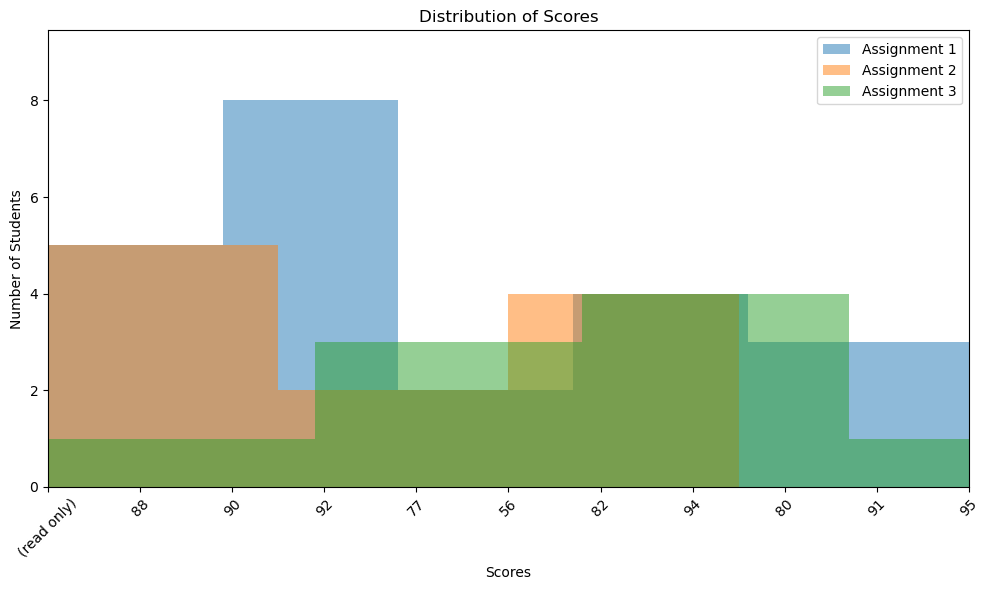

In [50]:




# Set figure size
plt.figure(figsize=(10, 6))

# Plot histograms
plt.hist(df6['Assignment 1 Current Score'].dropna(), bins=10, alpha=0.5, label='Assignment 1')
plt.hist(df6['Assignment 2 Current Score'].dropna(), bins=10, alpha=0.5, label='Assignment 2')
plt.hist(df6['Assignment 3 Current Score'].dropna(), bins=10, alpha=0.5, label='Assignment 3')

# Titles and labels
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Number of Students')

# Improve x-axis labels formatting and rotate them
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set the limits for x-axis to remove any unnecessary white space
# For example, if scores are between 0 and 100
plt.xlim([0, 10])

# Adjust layout
plt.tight_layout()

# Show legend
plt.legend(loc='upper right')

# Show plot
plt.show()
